In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv(r"C:\Users\m_vivekanandan\OneDrive - INFOTEL CONSEIL\Desktop\madmi\python\Time series\DEOK_hourly.csv")

In [31]:
df

,Datetime,DEOK_MW
0,2012-12-31 01:00:00,2945.0
1,2012-12-31 02:00:00,2868.0
2,2012-12-31 03:00:00,2812.0
3,2012-12-31 04:00:00,2812.0
4,2012-12-31 05:00:00,2860.0
...,...,...
57734,2018-01-01 20:00:00,4426.0
57735,2018-01-01 21:00:00,4419.0
57736,2018-01-01 22:00:00,4355.0
57737,2018-01-01 23:00:00,4224.0


In [32]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [33]:
df

,Datetime,DEOK_MW
0,2012-12-31 01:00:00,2945.0
1,2012-12-31 02:00:00,2868.0
2,2012-12-31 03:00:00,2812.0
3,2012-12-31 04:00:00,2812.0
4,2012-12-31 05:00:00,2860.0
...,...,...
57734,2018-01-01 20:00:00,4426.0
57735,2018-01-01 21:00:00,4419.0
57736,2018-01-01 22:00:00,4355.0
57737,2018-01-01 23:00:00,4224.0


In [34]:
df.set_index('Datetime', inplace=True)

In [35]:
df

,DEOK_MW
Datetime,
2012-12-31 01:00:00,2945.0
2012-12-31 02:00:00,2868.0
2012-12-31 03:00:00,2812.0
2012-12-31 04:00:00,2812.0
2012-12-31 05:00:00,2860.0
...,...
2018-01-01 20:00:00,4426.0
2018-01-01 21:00:00,4419.0
2018-01-01 22:00:00,4355.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57739 entries, 2012-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEOK_MW  57739 non-null  float64
dtypes: float64(1)
memory usage: 902.2 KB


adfuller test is to find the P-value

In [39]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['DEOK_MW'])

In [41]:
adf_test[1]

np.float64(1.4477674072053065e-27)

In [45]:
if adf_test[1] > 0.05:
    time_series_diff = df['DEOK_MW'].diff().dropna()
    print('Time series is not stationary')
else:
    time_series_diff = df['DEOK_MW']
    print('Time series is stationary')


Time series is stationary


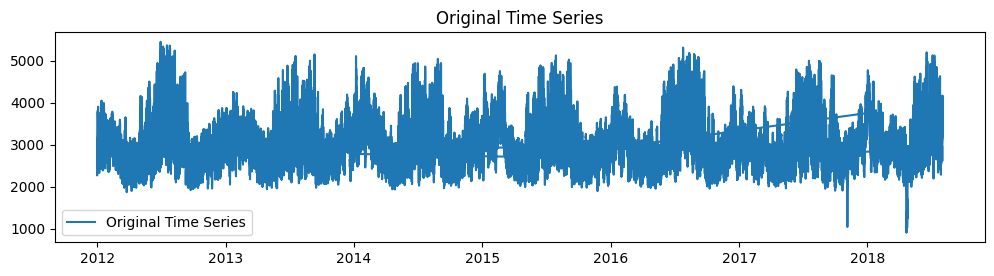

In [44]:
# Plot the original and differenced series
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df['DEOK_MW'], label="Original Time Series")
plt.title("Original Time Series")
plt.legend()

Since it is a stationary time series there is no diffence B/W Original and Differenced Time Series 

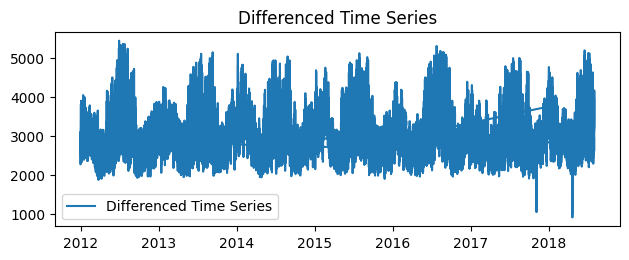

In [48]:
plt.subplot(2, 1, 2)
plt.plot(time_series_diff, label="Differenced Time Series")
plt.title("Differenced Time Series")
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
from statsmodels.tsa.arima.model import ARIMA

# Train an ARIMA model
arima_model = ARIMA(time_series_diff, order=(2, 1, 2))  # (p,d,q) parameters
arima_result = arima_model.fit()

C:\Users\m_vivekanandan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\m_vivekanandan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\m_vivekanandan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when

In [50]:
# Summary of the model
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                DEOK_MW   No. Observations:                57739
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -349860.104
Date:                Wed, 15 Jan 2025   AIC                         699730.208
Time:                        12:07:34   BIC                         699775.026
Sample:                             0   HQIC                        699744.154
                              - 57739                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7893      0.003    655.044      0.000       1.784       1.795
ar.L2         -0.8684      0.003   -324.222      0.000      -0.874      -0.863
ma.L1         -1.3702      0.004   -344.619      0.000      -1.378      -1.362
ma.L2          0.3957      0.004     99.447      0.000       0.388       0.404
sigma2      1.073e+04     23.092    464.744      0.000    1.07e+04    1.08e+04
===================================================================================
Ljung-Box (L1) (Q):                  74.79   Jarque-Bera (JB):            594868.83
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.39
Prob(H) (two-sided):                  0.62   Kurtosis:                        18.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""